<a href="https://colab.research.google.com/github/Jomail/Dacon-parking-demand-prediction/blob/master/%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 트랜스포머


> 트랜스포머
>> * RNN에서 사용한 순환 방식을 사용하지 않고 순수하게 셀프 어텐션만 사용함  
>> * 인코더와 디코더로 구성되어 있음

## 트랜스포머의 구성 요소

### 인코더의 구성 요소

> 인코더
>> 트랜스포머는 N개의 인코더가 쌓인 형태  
>> 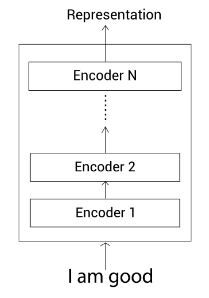


> 셀프 어텐션
>> * A dog ate the food because it was hungry.  
>> * 여기서 it이 가리키는 단어가 무엇인지 알기 위해서 it과 다른 모든 단어들과 연결 작업을 진행
>> 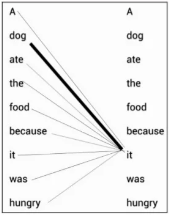  

> 셀프 어텐션의 작동 원리
>> * 각 단어의 임베딩 벡터값을 뽑은 후 쌓아서 행렬로 만듦 (문장 길이 * 임베딩 차원)  
>> * Wq , Wk , Wv라는 가중치 행렬이 존재하여 입력 행렬과 곱함  
>> * 곱해진 3개의 행렬들이 쿼리, 키, 밸류 행렬이 됨  

> 1단계 : 쿼리 행렬과 키 행렬의 내적 연산을 수행 ($QK ^ T$)
>> <img src="https://images.velog.io/images/byeo1019/post/9b190dfa-ecb8-4911-b10a-6b80c5a9b0b6/image.png">
>> 첫 번째 행은 쿼리 벡터 ($I$) 와 키 벡터들의 내적을 계산한 결과  
>> 즉 각 벡터들의 유사 정도를 알 수 있음

> 2단계 : 키 벡터 차원의 제곱근 값으로 나누어 스케일링을 진행
>> Dot Product를 진행하면 쿼리, 키 벡터의 차원에 따라 커지는 경향이 있어 학습에 방해가 됨
>> <img src="https://images.velog.io/images/byeo1019/post/e82684c1-2c30-43ad-9e12-dba91f3eb89f/image.png">

> 3단계 : 소프트맥스 함수를 사용하여 정규화 작업을 진행
>> 스코어 행렬  
>> <img src="https://images.velog.io/images/byeo1019/post/6d5713df-d7ba-4153-aaab-20d96623377c/image.png">

> 4단계 : 어텐션 행렬 계산
>> * 스코어 행렬에 밸류 행렬를 곱하면 어텐션 행렬을 구할 수 있음  
>> * $Z = softmax\left(\frac{QK ^ {T}}{\sqrt{d_{k}}}\right)V$
>> <img src="https://velog.velcdn.com/images%2Fbyeo1019%2Fpost%2F14ef74fc-6f2f-4012-a9cc-fc9f8380d123%2Fimage.png">

> 단계 요약
>> 1. 쿼리 행렬과 키 행렬 간의 내적을 계산 ($QK^{T}$) 하고 유사도 값을 산출  
>> 2. $QK^{T}$ 를 키 행렬 차원의 제곱근 ($\sqrt{d_{k}}$) 로 나눔  
>> 3. 스코어 행렬에 소프트맥스 함수를 적용해 정규화 작업 $\left(softmax\left(\frac{QK ^ {T}}{\sqrt{d_{k}}}\right)\right)$ 을 진행  
>> 4. 스코어 행렬에 밸류 행렬을 곱해 어텐션 행렬 $Z$ 를 산출




> 멀티 헤드 어텐션
>> * A dog ate the food because it was hungry.  
>> * $Z_{it} = 0 * A + 1 * dog + \cdots + 0 * hungry$ 라고 하자. 
>> * it의 의미는 dog에 대한 벡터값으로만 구성됨  
>> * 적절한 의미를 가진 단어의 벡터값이 잘 할당되면 문장의 의미를 이해하는데 좋은 영향을 줄 수 있음  
>> * 의미가 맞지 않은 단어의 벡터값이 높을 경우에는 문장의 의미가 잘못 해석될 수 있음  
>> * 어텐션 결과의 정확도를 높이기 위해서 단일 헤드 어텐션 행렬이 아닌 멀티 헤드 어텐션을 사용함  
>> * 두 개의 어텐션만을 이용하여 멀티 헤드 어텐션을 계산한다고 해보자.
>>> * $Z_{1} = softmax\left(\frac{Q_{1}K_{1} ^ {T}}{\sqrt{d_{k}}}\right)V_{1}, \quad Z_{2} = softmax\left(\frac{Q_{2}K_{2} ^ {T}}{\sqrt{d_{k}}}\right)V_{2}$  
>>> * 멀티 헤드 어텐션 : $concatenate(Z_{1}, \; Z_{2})W_{0}$

> 위치 인코딩
>> * 단어들을 병렬로 입력하면 단어의 순서 정보가 유지되지 않은 상태이기 때문에 문장의 의미가 어긋남  
>> * 문장의 의미를 이해하기 위해서는 단어의 위치 정보가 매우 중요함  
>> * 네트워크에서 문장의 의미를 이해할 수 있도록 단어의 순서를 표현하는 정보를 추가로 제공해야함  
>> * 입력 행렬에 위치 인코딩 행렬값 추가  
>> 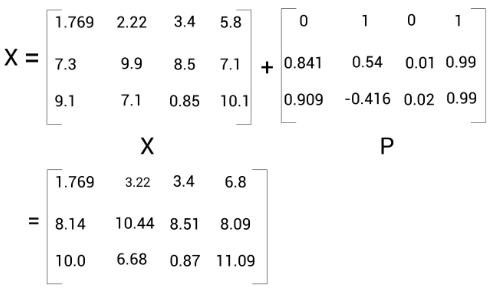  
>> 위치 인코딩 계산
>>> * $P(pos, 2i) = sin\left(\frac{pos}{1000 ^ {\frac{2i}{d_model}}}\right), \quad P(pos, 2i + 1) = cos\left(\frac{pos}{1000 ^ {\frac{2i}{d_model}}}\right)$  
>>> * $pos$ 는 문장에서 단어의 위치, $\; i$ 는 해당 위치의 임베딩  
>>> * $i$ 값이 짝수인 경우 사인 함수, $\; i$ 값이 홀수인 경우 코사인 함수
>>> 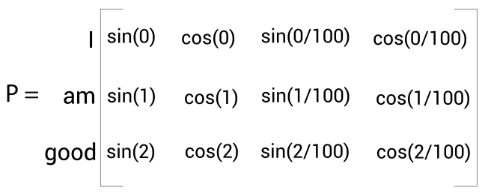

> 피드포워드 네트워크
>> 2개의 dense layer와 ReLU 활성화 함수로 구성됨

> add와 norm 요소
>> * 서브레이어에서 멀티 헤드 어텐션의 입력값과 출력값을 서로 연결함  
>> * 서브레이어에서 피드포워드의 입력값과 출력값을 서로 연결함  
>> * 레이어 정규화와 잔차 연결의 역할을 함

> 인코더 도식화
>> 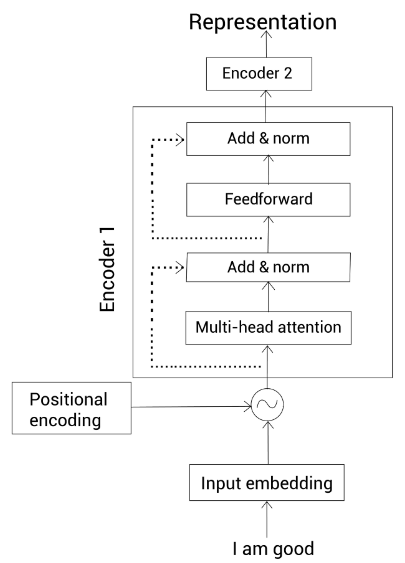  
>> 1. 입력값을 임베딩 행렬로 변환하고 위치 인코딩을 더해서 인코더 1을 입력값으로 집어넣음  
>> 2. 인코더 1은 입력값을 받아 멀티 헤드 어텐션에 값을 보내고 어텐션 행렬 출력  
>> 3. 어텐션 행렬을 피드포워드 네트워크에 보내고 인코더 표현을 출력  
>> 4. 인코더 1의 표현을 인코더 2이 입력값으로 넣음  
>> 5. 위 과정 계속 반복


> 디코더
>> * "I am good" 을 입력하면 "Je vais bien" 을 생성하는 번역기를 만든다고 가정하자.  
>> * 디코더는 문장을 단어로 나누어 차례대로 하나씩 출력하게 됨  
>> * t = 1 일 때 디코더의 입력값은 \<SOS> 가 되고 타깃 문장의 첫 번째 단어인 "Je" 를 출력  
>> * t = 2 일 때 t = 1 일 때 정보를 추가하여 다음 단어를 출력  
>> * t = 3 일 때도 똑같이 진행  
>>> 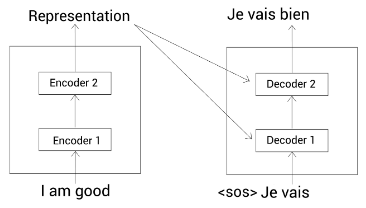

> 마스크된 멀티 헤드 어텐션  
>> * 디코더의 입력 문장은 "\<SOS> Je vais bien"  
>> * 인코더에서 셀프 어텐션을 이용했던 것과 달리 디코더는 이전 단계에서 생성한 단어만 사용  
>> * t = 2 일 때 디코더의 입력 단어는 "\<SOS>", "Je" 만 들어감  
>> * 셀프 어텐션할 때 "Je" 만 고려해야 하므로 아직 예측하지 않은 오른쪽 단어들을 마스킹해야함  
>> * 마스킹할 때 아주 작은 값을 이용 ($-\infty, \; e ^ {-9}$)  
>> * 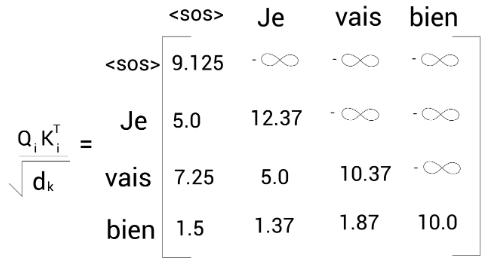
>> * $Z_{i} = softmax\left(\frac{Q_{i}K_{i} ^ {T}}{\sqrt{d_{k}}}\right)V_{i}$  
>> * $M = concatenate(Z_{1}, \; Z_{2}, \; \cdots, \; Z_{i}, \; \cdots, \; Z_{h}) W_{0}$  

> 멀티 헤드 어텐션
>> * 디코더의 멀티 헤드 어텐션은 이전 서브레이어의 출력값과 인코더의 표현을 받음  
>> * 인코더의 표현을 R, 이전 서브레이어의 결과를 M이라고 하자.  
>> * M을 이용하여 쿼리 행렬을 생성하고 R을 이용해서 키 행렬과 밸류 행렬 생성  
>>> 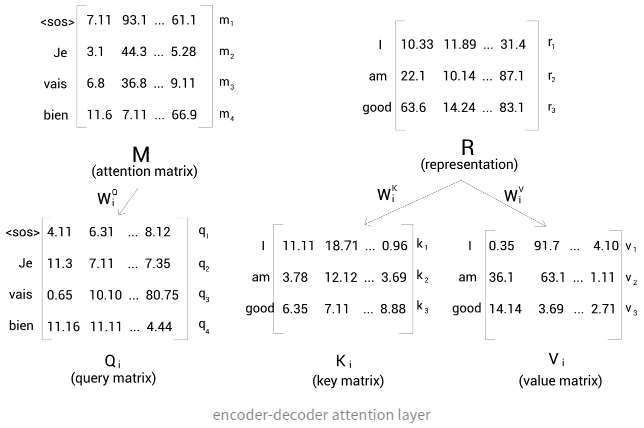

> 피드포워드 네트워크와 add와 norm 요소
>> 인코더와 동일한 구조

> 디코더 도식화
>> 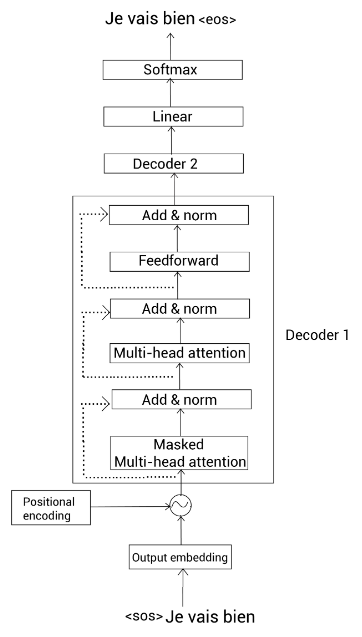  
>> 1. 입력 문장을 임베딩 행렬로 변환하고 위치 인코딩 정보를 더해서 디코더에 입력  
>> 2. 마스크된 멀티 헤드 어텐션 레이어에 보내고 출력으로 어텐션 행렬 M을 반환  
>> 3. 어텐션 행렬 M, 인코딩 표현 R을 입력받아 멀티 헤드 어텐션 레이어에 값을 입력하고 새로운 어텐션 행렬 생성  
>> 4. 어텐션 행렬을 피드포워드 네트워크에 입력한 후 디코더의 표현 출력  
>> 5. 디코더 1의 출력값을 다음 디코더 2의 입력값으로 사용한다.  
>> 6. 위 과정 계속 반복  
>> 7. 선형 레이어와 소프트 맥스 레이어를 지나 문장 생성

> 인코더와 디코더 결합
>> 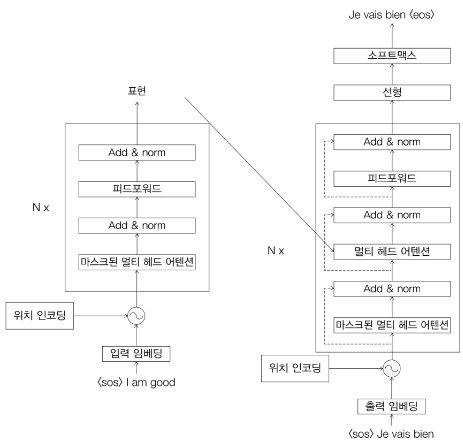

> 트랜스포머 학습
>> 손실 함수 : 교차 엔트로피 $\rightarrow H(p, q) = -\sum ^ {K} _ {k = 1}p(X = k)\;log\;q(X = k)$